In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.datasets import make_blobs

In [4]:
data = pd.read_csv("/content/data.csv", sep =';')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


1.Marital Status: 1 – single, 2 – married, 3 – widower, 4 – divorced, 5 – facto union, 6 – legally separated

2.Application mode: 1 - general, 2 - Ordinance No. 612/93, 5 - special (Azores), 15 - International student, 39 - Over 23 years old

3.Application order: Порядок выбора (0 - первый, 9 - последний)

4.Course: 33 - Biofuel, 171 - Animation, 9003 - Agronomy, 9500 - Nursing, 9773 - Journalism

5.Daytime/evening attendance: 1 – daytime, 0 - evening

6.Previous qualification: 1 - Secondary, 2 - Bachelor's, 3 - Degree, 4 - Master's, 5 - Doctorate

7.Previous qualification (grade): Градус (0 - 200)

8.Nacionality: 1 - Portuguese, 2 - German, 11 - Italian, 41 - Brazilian, 109 - Colombian

9.Mother's qualification: 1 - Secondary, 2 - Bachelor's, 4 - Master's, 5 - Doctorate

10.Father's qualification: 1 - Secondary, 2 - Bachelor's, 4 - Master's, 5 - Doctorate

11.Mother's occupation: 0 - Student, 1 - Legislative and Executive Representatives, 2 - Specialists, 4 - Administrative staff, 122 - Health professionals

12.Father's occupation: 0 - Student, 1 - Legislative and Executive Representatives, 2 - Specialists, 4 - Administrative staff, 122 - Health professionals

13.Admission grade: Градус (0 - 200)

14.Displaced: 1 – yes, 0 – no

15.Educational special needs: 1 – yes, 0 – no

16.Debtor: 1 – yes, 0 – no

17.Tuition fees up to date: 1 – yes, 0 – no

18.Gender: 1 – male, 0 – female

19.Scholarship holder: 1 – yes, 0 – no

20.Age at enrollment: Возраст студента на момент поступления

21.International: 1 – yes, 0 – no

22.Curricular units 1st sem (credited): Количество курсов, зачет в 1-м семестре

23.Curricular units 1st sem (enrolled): Количество курсов, зачисленных в 1-м семестре

24.Curricular units 1st sem (evaluations): Количество оценок за курсы в 1-м семестре

25.Curricular units 1st sem (approved): Количество курсов, утвержденных в 1-м семестре

26.Curricular units 1st sem (grade): Средний балл за 1-й семестр (0–20)

27.Curricular units 1st sem (without evaluations): Количество курсов без оценок в 1-м семестре

28.Curricular units 2nd sem (credited): Количество курсов, зачет в 2-м семестре

29.Curricular units 2nd sem (enrolled): Количество курсов, зачисленных в 2-м семестре

30.Curricular units 2nd sem (evaluations): Количество оценок за курсы в 2-м семестре

31.Curricular units 2nd sem (approved): Количество курсов, утвержденных во 2-м семестре

32.Curricular units 2nd sem (grade): Средний балл за 2-й семестр (0–20)

33.Curricular units 2nd sem (without evaluations): Количество курсов без оценок во 2-м семестре

34.Unemployment rate: Уровень безработицы (%)

35.Inflation rate: Уровень инфляции (%)

36.GDP: Валовой внутренний продукт (ВВП)

37.Target: Целевая переменная (dropout, enrolled, graduate)

In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Таргетом в данной задаче будет статус студента - Dropout-Отчисленный - 0, Enrolled - Зачисленный - 1, Graduate - Выпускник -2.
Закодируем столбец и удалим его из исходного датасета

In [6]:
data['Target'].replace(['Dropout', 'Enrolled', 'Graduate'],
                        [0, 1, 2], inplace=True)
y = data.pop('Target')

<ipython-input-6-12258f0e3e28>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Target'].replace(['Dropout', 'Enrolled', 'Graduate'],
<ipython-input-6-12258f0e3e28>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Target'].replace(['Dropout', 'Enrolled', 'Graduate'],


Посмотрим, есть ли дисбаланс классов

In [7]:
y.value_counts()

,count
Target,
2,2209
0,1421
1,794


Масштабируем

In [8]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(data)

Применим t-SNE для визуализации высокомерных данных

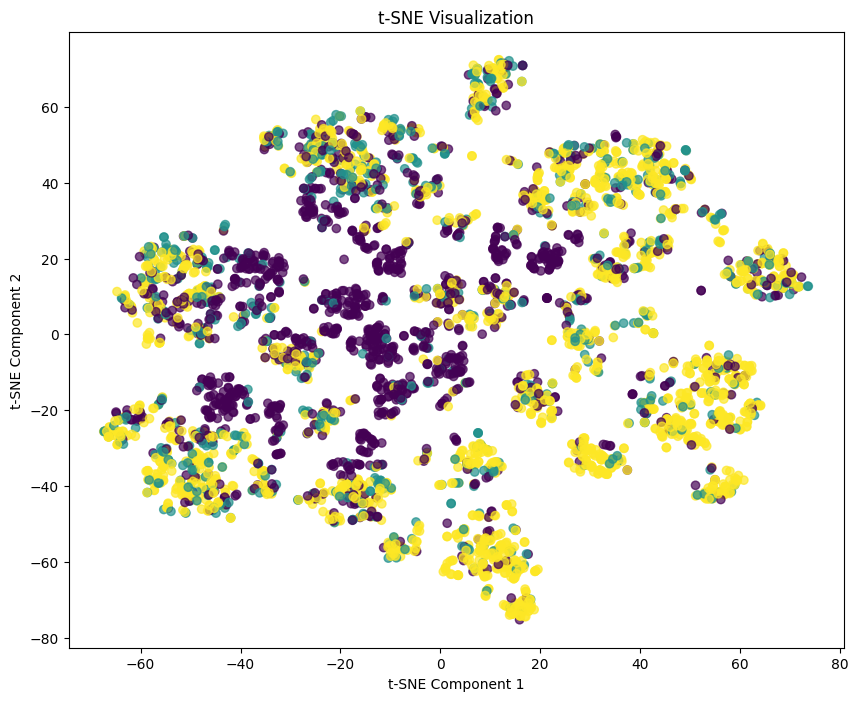

In [9]:
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
df_tsne = tsne.fit_transform(df_scaled)


plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=y, cmap='viridis', marker='o', alpha=0.7)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

Оптимальное количество классов для алгоритма KMeans - 3 класса, как по таргету из датасета. Dropout-Отчисленный - 0, Enrolled - Зачисленный - 1, Graduate - Выпускник -2

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(df_scaled)
print("Оценка силуэта:", silhouette_score(df_scaled, labels_kmeans))
print("Оценка скорректированного рэнда:",adjusted_rand_score(y, labels_kmeans))

Оценка силуэта: 0.1266103744712279
Оценка скорректированного рэнда: 0.036610633562865535


Оценка силуэта должна быть близка к 1 - это обозначает хорошее разбиение. Оценка скорректированного рэнда должна быть близка к 1 - это обозначает хорошее предсказание классов.

В нашем случае оценка силуэта имеет плохое качество разбиения, оценка ск. рэнда - плохое. Но несмотря на это я продолжу работу в блокноте, надеясь, что даже плохой результат - тоже результат :)

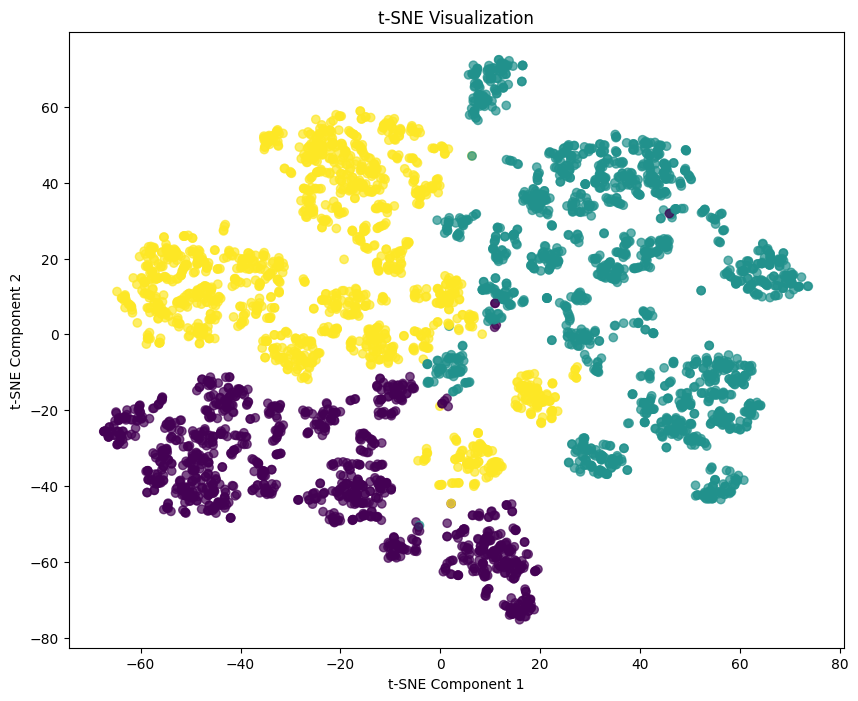

In [11]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=labels_kmeans, marker='o', alpha=0.7)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

Агломеративная кластеризация

In [13]:
aggl = AgglomerativeClustering(n_clusters=3)
labels_aggl = aggl.fit_predict(df_scaled)
print("Оценка силуэта:", silhouette_score(df_scaled, labels_aggl))
print("Оценка скорректированного рэнда:",adjusted_rand_score(y, labels_aggl))

Оценка силуэта: 0.06808187570210655
Оценка скорректированного рэнда: 0.1006690061689621


Качество почти такое же, что и при обучении методом kMeans. Оценка силуэта стала хуже, оценка скор рэнда немного улучшилась

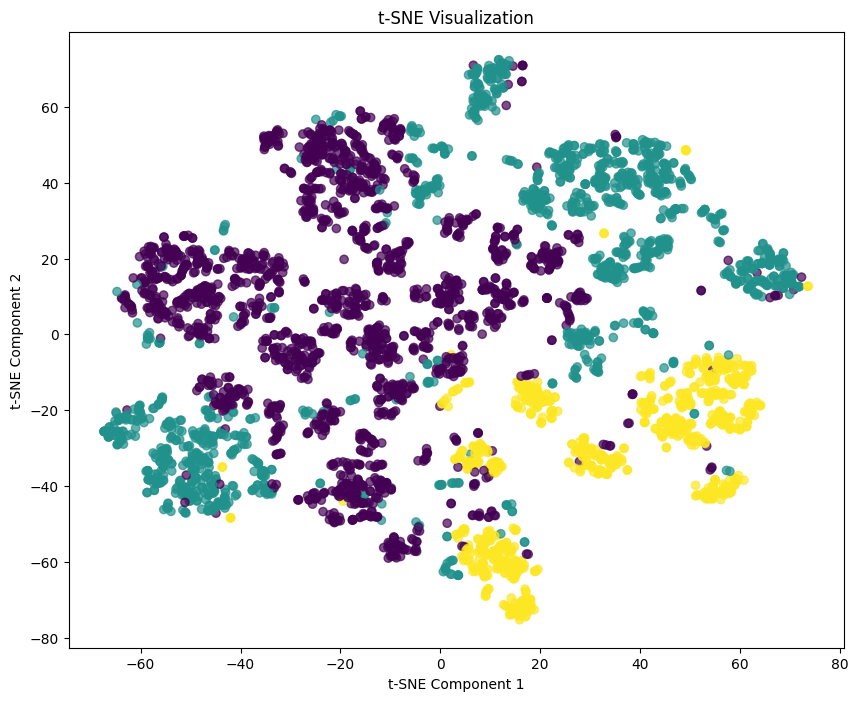

In [14]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=labels_aggl, marker='o', alpha=0.7)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

DBSCAN кластеризация

In [21]:
dbsc = DBSCAN(eps=0.8, min_samples=12)
labels_dbsc = dbsc.fit_predict(df_scaled)
print("Оценка силуэта:", silhouette_score(df_scaled,labels_dbsc))
print("Оценка скорректированного рэнда:",adjusted_rand_score(y, labels_dbsc))

Оценка силуэта: 0.005891697699658054
Оценка скорректированного рэнда: 0.044702617288719174


На этой модели качество упало по обеим метрикам.     

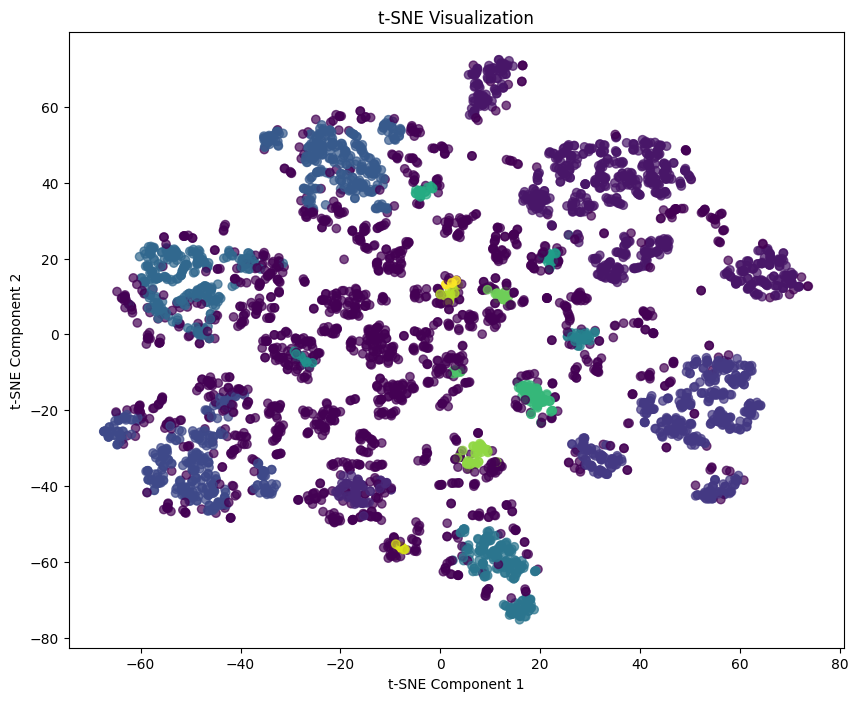

In [22]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=labels_dbsc, marker='o', alpha=0.7)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()